-1710895.0617872213
[868.22718531]
43792.07972987788


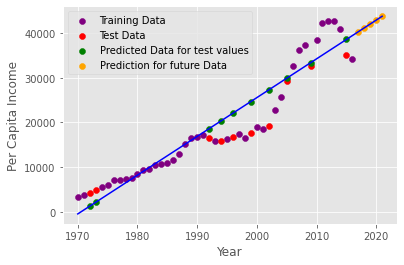

In [8]:
# Using captia_income data set, build a regression model and predict the per capitia income for Canadian citizens in year 2021.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Import data set
dataset=pd.read_csv('../Data/captia_income.csv')


# To create feature matrix and dependent variable vector
# X is the year 
# Y is the per caita income of that year
x=np.array(dataset.iloc[:,:-1].values)
y=np.array(dataset.iloc[:,-1].values)

# Replace missing data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x)
x=imputer.transform(x)


# # Feature scaling 
# sc=StandardScaler()
# x=sc.fit_transform(x)


# # Dependent variable vector using label encoder
# le=LabelEncoder()
# y=le.fit_transform(y)


# Splitting of data into training data set and testing data set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)  


# Build a multiple linear model
regn=LinearRegression()
regn.fit(xtrain,ytrain)




# #Inversing the transformations for plotting
# xtrain = sc.inverse_transform(xtrain)
# ytrain = le.inverse_transform(ytrain)
# xtest = sc.inverse_transform(xtest)
# ytest = le.inverse_transform(ytest)
# x = sc.inverse_transform(x)
# y = le.inverse_transform(y)

#Finding the predicted values for the test data
yestimated = regn.predict(xtest)

# Plotting the predicted data(green) vs the testing data(red) 
plt.xlabel("Year")
plt.ylabel("Per Capita Income")

train_plot = plt.scatter(xtrain,ytrain,color = 'purple') 
test_plot = plt.scatter(xtest,ytest,color = 'red')
pred_plot = plt.scatter(xtest,yestimated,color = 'green')



# Find the predicted per capita income for year 2021 
pred_X = [[2017],[2018],[2019],[2020],[2021]]
pred_Y = regn.predict(pred_X)

print(regn.intercept_)
print(regn.coef_)
print(pred_Y[-1])

out_plot = plt.scatter(pred_X,pred_Y,color = 'orange')


plt.plot(np.linspace(x[0],2021,len(x)) , regn.intercept_ + regn.coef_* np.linspace(x[0],2021,len(x)),color = "blue")

plt.legend((train_plot,test_plot,pred_plot,out_plot),("Training Data","Test Data","Predicted Data for test values","Prediction for future Data"),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)

plt.show()


Estimated coefficients:
b_0 = -1632210.757855453            
b_1 = 828.4650752227082
42117.15916964016


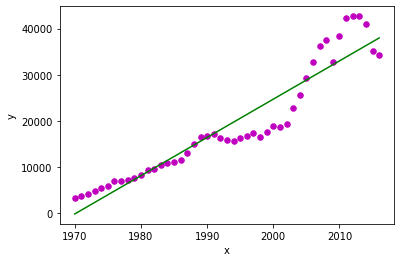

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data set
dataset=pd.read_csv('../Data/captia_income.csv')


# To create feature matrix and dependent variable vector
x=dataset.iloc[:,:-1].values
x =x.reshape(len(x))
y=dataset.iloc[:,-1].values


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

    
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
print(b[0]+b[1]*2021)
# plotting regression line
plot_regression_line(x, y, b)